In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ["DTD","EuroSAT","GTSRB","MNIST","SVHN","Caltech256"]

In [21]:
ds = "DTD"
df = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
df18 = pd.read_csv(f"../Pred/{ds}_Resnet18.csv")
df50 = pd.read_csv(f"../Pred/{ds}_Resnet50.csv")
df101 = pd.read_csv(f"../Pred/{ds}_Resnet101.csv")
display(df.head(1))
display(df18.head(1))
pred_list = df.columns.to_list()
pred_list.remove("target")
print(pred_list)
for pred_col in pred_list:
    pred = df[pred_col]
    actuals = df["target"]
    # Calculate Accuracy
    curr_acc = np.mean(pred==actuals)
    print(curr_acc)

,pred18,pred50,pred101,target
0,0,0,0,0


['pred18', 'pred50', 'pred101']
0.5526595744680851
0.5558510638297872
0.5175531914893617


In [ ]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]
    

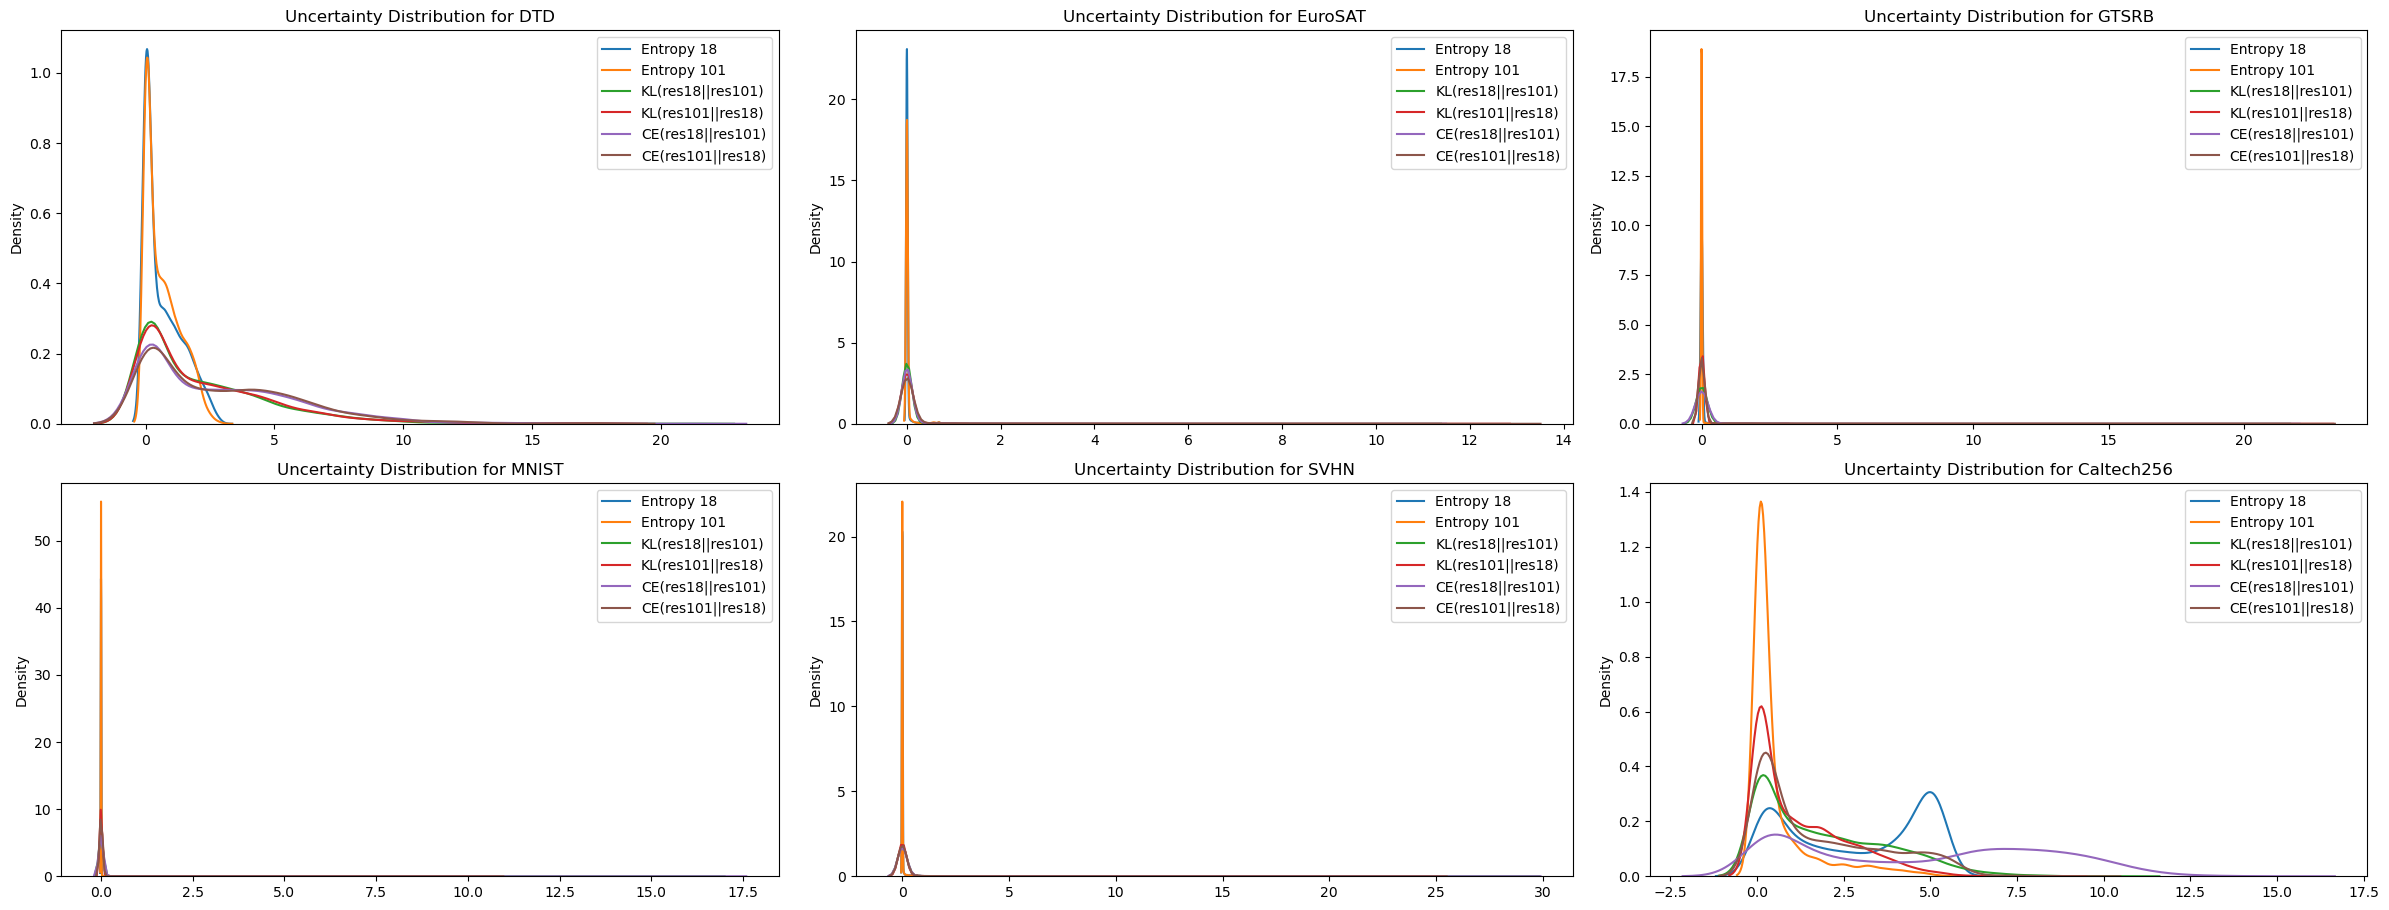

In [17]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(unc_pred["ent_18"], label='Entropy 18', ax=ax)
    sns.kdeplot(unc_pred["ent_101"], label='Entropy 101', ax=ax)
    sns.kdeplot(unc_pred["kl_18_101"], label='KL(res18||res101)', ax=ax)
    sns.kdeplot(unc_pred["kl_101_18"], label='KL(res101||res18)', ax=ax)
    sns.kdeplot(unc_pred["ce_18_101"], label='CE(res18||res101)', ax=ax)
    sns.kdeplot(unc_pred["ce_101_18"], label='CE(res101||res18)', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("artifacts/uncertainty_distributions.png")

plt.show()

/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

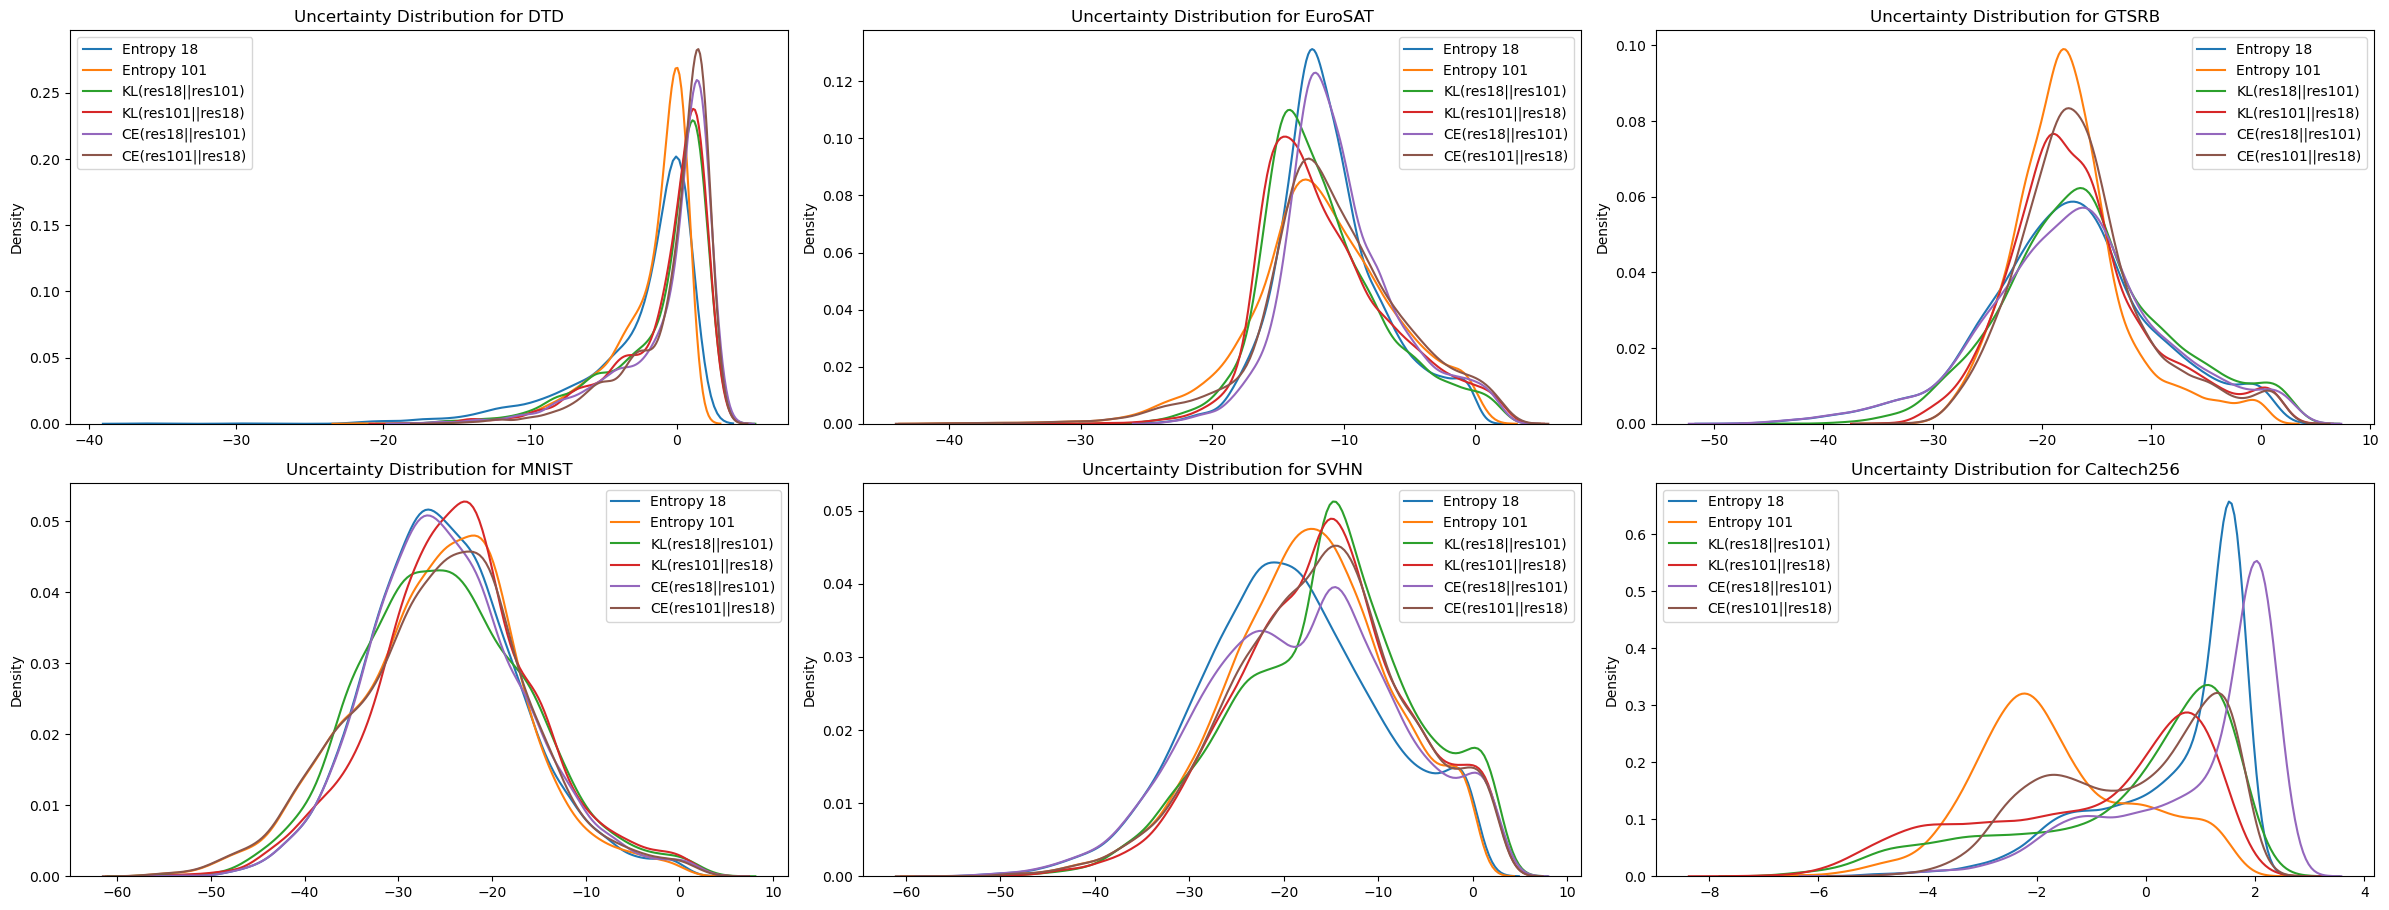

In [18]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(np.log(unc_pred["ent_18"]), label='Entropy 18', ax=ax)
    sns.kdeplot(np.log(unc_pred["ent_101"]), label='Entropy 101', ax=ax)
    sns.kdeplot(np.log(unc_pred["kl_18_101"]), label='KL(res18||res101)', ax=ax)
    sns.kdeplot(np.log(unc_pred["kl_101_18"]), label='KL(res101||res18)', ax=ax)
    sns.kdeplot(np.log(unc_pred["ce_18_101"]), label='CE(res18||res101)', ax=ax)
    sns.kdeplot(np.log(unc_pred["ce_101_18"]), label='CE(res101||res18)', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("artifacts/log_uncertainty_distributions.png")

plt.show()